# Mini Project 

## 주제 :당뇨병 데이터 시각화

### 당뇨병이란?

<br>췌장의 랑게르한스섬에서 분비되는 인슐린이 부족할 때 발생한다. 소변에서 단맛이 난다는 이유로 당뇨라는 명칭이 만들어졌다.</br>

### 당뇨병의 원인은?
<br>몸에서 쓰이는 포도당을 정상적으로 이용하지 못할 때 생긴다. 췌장이 망가져 인슐린이 제대로 나오지 못하거나 나와도 그 효과가 작아 피속의 당이 제대로 사용되지 못하여 장애가 발생한다.</br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [213]:
# 데이터셋 호출
diab = pd.read_csv("./Downloads/diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [214]:
# 데이터셋 정보 확인
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [215]:
# Glucose : 혈중 포도당
# DiabetesPedigreeFunction : 가족 이력

In [216]:
# 데이터셋의 결측치 확인
diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

NaN 값은 존재하지 않는걸 확인할 수 있다.

In [217]:
diab.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


최소값이 0인 데이터들이 많이 보인다.

그런데 Glucose, BloodPressure, SkinThickness, Insulin, BMI의 경우는 0일 수가 없다.

그래서 이 컬럼들의 값이 0인경우를 결측치로 생각해야한다.

결측치로 처리해야할 컬럼(값이 0인 경우)

Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [218]:
# 결측치가 있는 컬럼 찾기

missingValue=[]
for key in diab.keys()[1:-1]:
    if True in (diab[key]==0).values:
        missingValue.append(key)

In [219]:
# 결측치를 NaN으로 처리

for col in missingValue:
    cnt=0
    for j in diab[col].values:
        if j == 0:
            diab[col][cnt]=np.nan
        cnt+=1

In [220]:
diab.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Text(0.5, 1.0, '결측치 개수')

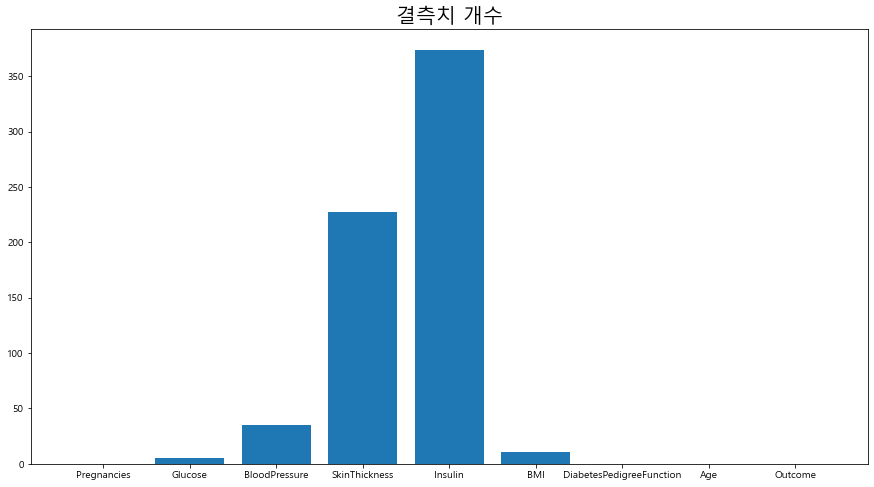

In [221]:
# 결측치가 나온 컬럼들과 결측치 수 그래프

isNa = diab.isna().sum().to_frame().T
# isNa

x = isNa.columns
y = isNa.values[0]

plt.figure(figsize=(15,8))
plt.bar(x,y)
plt.title("결측치 개수",fontdict={"size":20})

In [13]:
# diab.describe()

0인 값을 결측치로 처리하기에 **피부두께와 인슐린은 결측치로 변화되는 값이 너무 많다**

피부두께와 인슐린의 NaN값을 모두 지운다면 데이터의 수가 너무 줄어들것 같다.

그런데 피부두께와 인슐린을 제외하고는 NaN값이 존재하는 행을 지워도 데이터의 수가 크게 줄어들진 않으므로

나머지 컬럼의 NaN값을 갖는 행은 제거하고 피부두께와 인슐린의 결측치는 평균으로 대체하자

In [222]:
# "Glucose","BloodPressure","BMI" 컬럼들의 NaN값이 있는 행 제거

diab.dropna(subset=["Glucose","BloodPressure","BMI"],inplace=True)

인슐린과 피부두께의 결측치는 당뇨병 여부의 평균으로 넣어주자

In [237]:
diab.fillna({"Insulin":diab["Insulin"].mean(),
             "SkinThickness":diab["SkinThickness"].mean()},inplace=True)
# diab.isna().sum()

In [245]:
diab.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.080257,0.055469,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.195760,0.428967,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.192653,0.073125,0.287403,-0.000075,0.324897,0.166703
SkinThickness,0.080257,0.195760,0.192653,1.000000,0.156235,0.554207,0.105412,0.126468,0.216717
Insulin,0.055469,0.428967,0.073125,0.156235,1.000000,0.169843,0.103906,0.138411,0.219830
BMI,0.012342,0.223276,0.287403,0.554207,0.169843,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.105412,0.103906,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,0.126468,0.138411,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.216717,0.219830,0.299375,0.184947,0.245741,1.000000


In [207]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.246118,156.990054,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,2.703405,36.121960,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,27.290141,130.854962,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.290141,130.854962,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.290141,130.854962,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,32.977401,206.846154,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,32.977401,206.846154,67.100000,2.420000,81.000000,1.000000


BMI지수와 피부두께, 인슐린분비와 포도당, 나이와 임신횟수의 상관관계가 높게 나타난다.

<AxesSubplot:>

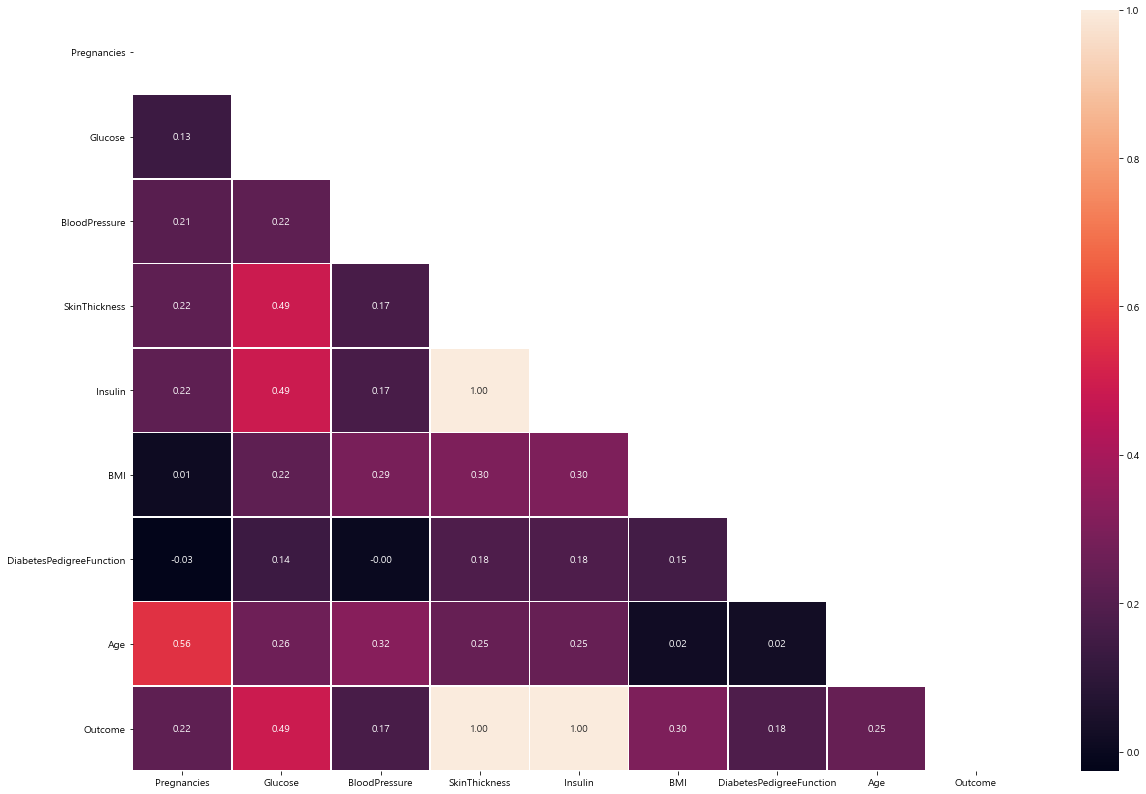

In [209]:
plt.figure(figsize=(20,14))

corr = diab.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt = ".2f", lw = 0.5, mask=mask)

## 당뇨병 여부(Outcome)컬럼과 다른 컬럼과의 값을 비교, 시각화해보자

<AxesSubplot:>

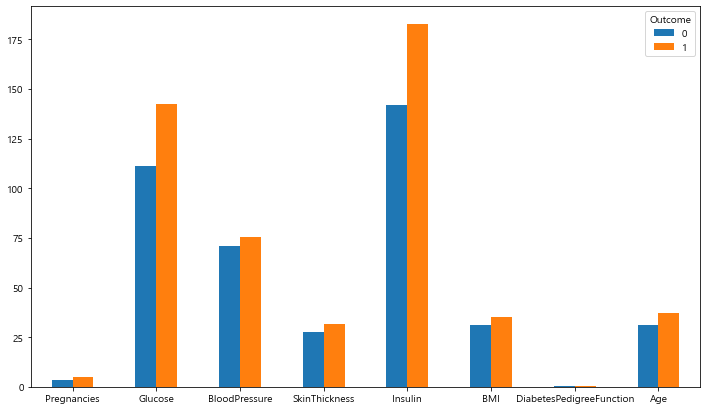

In [259]:
# 당뇨병 여부에 따른 컬럼들의 평균치
outcome = diab.groupby("Outcome").mean()
# outcome.T
outcome.T.plot.bar(figsize=(12,7), rot=0)

In [168]:
# 당뇨병 환자의 비율
out = diab["Outcome"].value_counts().to_frame()
# out
px.pie(out,values="Outcome",names="Outcome")

당뇨병 환자의 연령별 분포

<AxesSubplot:xlabel='Age', ylabel='Count'>

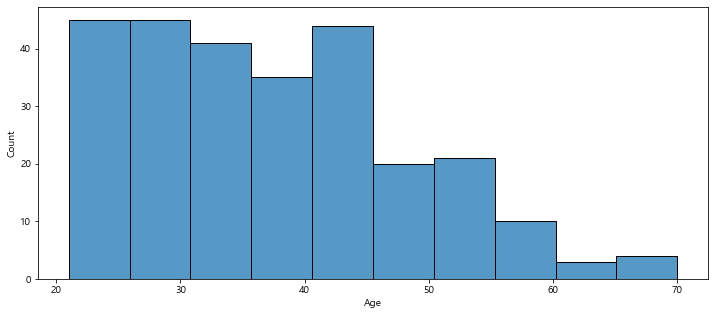

In [169]:
plt.figure(figsize=(12,5))
sns.histplot(diab[diab["Outcome"]==1]["Age"],
             bins = 10)

당뇨병 환자는 20대 ~ 40대 중반이 가장 많은걸로 보인다

그런데 50대, 60대에서는 왜 당뇨병환자의 수가 적게 나타날까?

50대,60대의 수가 적어서 당뇨병 환자의 수가 적은 것이 아닐까?

우선 전체 인원수 중 50대의 60대의 수를 살펴보자

In [170]:
diab_copy["age_slice"].value_counts()

20대    417
30대    157
40대    113
50대     54
60대     25
70대      1
80대      1
Name: age_slice, dtype: int64

살펴보면 전체 인원수 중 50,60대의 수는 10%로 밖에 안되는걸 알 수있다.

그렇다면 나이대별 당뇨병 환자의 수를 비교해보자

In [171]:
# 연령별 구간 나누기

age_slice = list(range(20,100,10))
age_name = [str(x)+"대" for x in age_slice[:-1]]
# age_name

diab_copy = diab.copy()
diab_copy["age_slice"] = pd.cut(diab_copy["Age"],age_slice, labels=age_name)
diab_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_slice
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,40대
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,30대
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,30대
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,20대
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,30대
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,60대
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,20대
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,20대
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,40대


<AxesSubplot:xlabel='age_slice'>

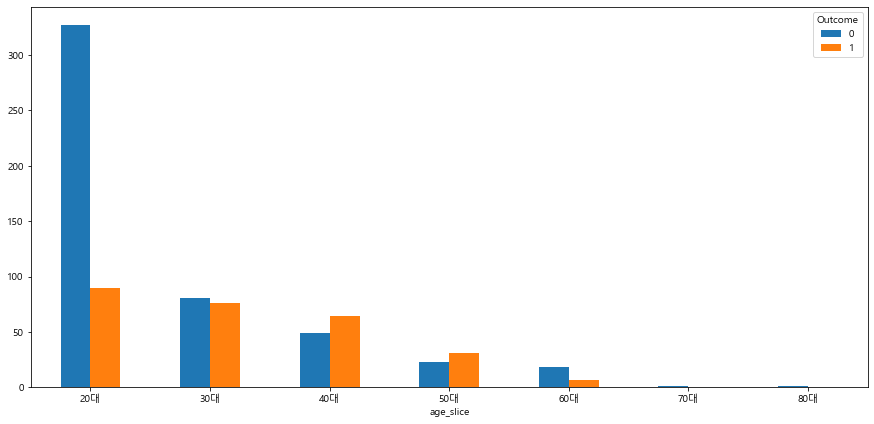

In [172]:
age = diab_copy.pivot_table(index="Outcome",columns="age_slice",aggfunc="size")
# age.T
age.T.plot.bar(figsize=(15,7), rot=0)

표본이 적은 60대를 제외하고 나이대가 높아지면 당뇨병에 걸릴 확률이 높다는걸 알 수 있다.

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

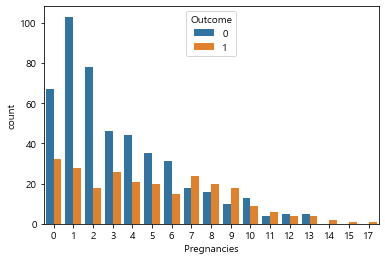

In [247]:
# 임신횟수
sns.countplot(data=diab, x="Pregnancies",hue="Outcome")

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

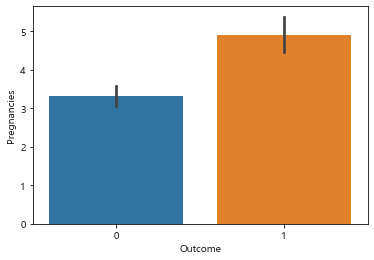

In [267]:
sns.barplot(data=diab, x="Outcome",y="Pregnancies")

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

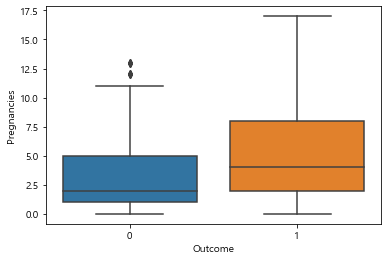

In [289]:
sns.boxplot(data=diab, x="Outcome",y="Pregnancies")

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

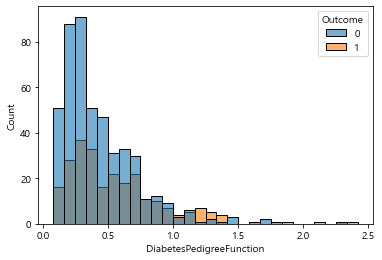

In [287]:
# DiabetesPedigreeFunction (가족 이력)

sns.histplot(data=diab, x="DiabetesPedigreeFunction",hue="Outcome",alpha=0.6)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

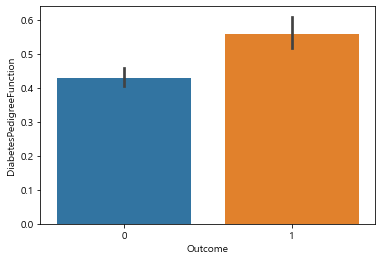

In [288]:
sns.barplot(data=diab, x="Outcome",y="DiabetesPedigreeFunction")

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

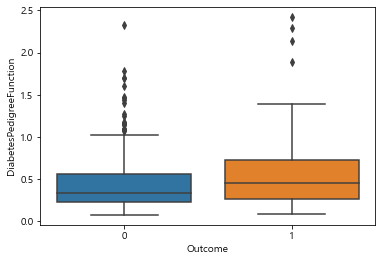

In [290]:
sns.boxplot(data=diab, x="Outcome",y="DiabetesPedigreeFunction")

In [293]:
# diab[["DiabetesPedigreeFunction","Outcome"]].corr()

임신횟수와 가족이력은 당뇨병과 약한 양의 상관관계를 갖는듯하다.

## 상관분석

In [256]:
# 당뇨병과 상관관계가 높은 컬럼들
diab.corr()["Outcome"].sort_values(ascending=False).to_frame()

,Outcome
Outcome,1.000000
Glucose,0.488384
BMI,0.299375
Age,0.245741
Pregnancies,0.224417
Insulin,0.219830
SkinThickness,0.216717
DiabetesPedigreeFunction,0.184947
BloodPressure,0.166703


포도당 수치가 높고 BMI지수가 높으면 당뇨병에 걸릴 확률이 높다고 생각된다.

그러고 위의 히트맵으로 시각화했던 상관관계에서 포도당은 인슐린과, BMI는 피부두께와 상관관계가 높다는걸 알 수 있다.

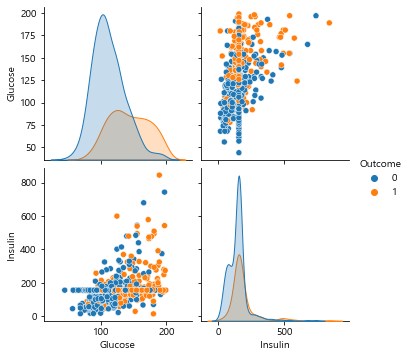

In [257]:
sns.pairplot(diab[["Glucose","Insulin","Outcome"]],hue="Outcome")

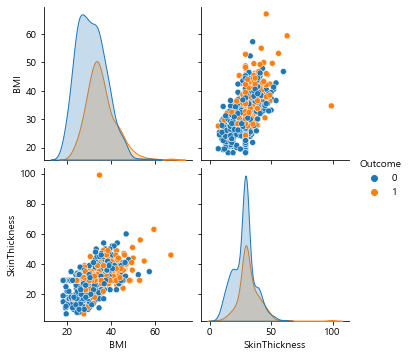

In [258]:
sns.pairplot(diab[["BMI","SkinThickness","Outcome"]],hue="Outcome")

## 당뇨병 예상

In [294]:
test = pd.read_csv("./Downloads/diabetes.csv")
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [297]:
# test.isna().sum()

# 0값이 있는 컬럼들 찾기(결측치 확인)

missingValue=[]
for key in test.keys()[1:-1]:
    if True in (test[key]==0).values:
        missingValue.append(key)
missingValue

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']